# Decaimento Radioativo

O problema do decaimento radioativo é dado por uma amostra radioativa de material possuindo N núcleons que irão decair aleatoriamente em algum instante t. O problema é determinar quantos núcleons estarão em estado de emissão (ainda não decaídos) sabendo num dado instante inicial a população.


O nosso modelo será dado conforme [Física em computadores] - Coleção CBPF - Paulo e Suzana Oliveira. Escrito da forma $N(t+\Delta t) = N(t)(1 - \alpha\Delta t)$.

Para o nosso caso específico usaremos os valores do Rb$^{82}$, com decaimento $\alpha = 9.24\cdot10^{-3} s^{-1}$. Podemos entretanto realizar uma tabela com os valores dos decaimentos de outras substâncias. Fazer a leitura desse arquivo e atribuir o tempo de decaimento.

In [42]:
from math import log
import matplotlib.pyplot as plt


class Radioactivity():
    
    def __init__(self, nome = ''):
        while True:
            try:
                self.nome = nome
                self.meiaVida = float(Radioactivity.__data[nome])
                self.alpha = log(2)/self.meiaVida
                self.vidaMedia = 1/self.alpha
                break
            except KeyError:
                print("Nome fora da lista")
                
                # aqui deve entrar uma função para adicionar um novo elemento na pré-carregada ou não
                
                break
         
          
    
    # Esse método carrega os dados tabelados de algumas substâncias e importa para um dicionário. É neste
    # dicionário que fica a informação interna à classe. A partir disso é possível trazer o nome e meia-vida
    # da substância e então usar estes dados para setar os atributos 
    
    def __dataInfo():
        arqv = open('decaimento_tabela.csv','r')
        data = []
        colunas = arqv.read().split('\n')
        colunas.pop()
        for coluna in colunas:
            split_row = coluna.split(",")
            data.append(split_row)
    
        data = dict(data) 
        data.pop('nome') # é removida o header das colunas a fim de obter apenas os elementos e as meias-vidas
        arqv.close()
        return data
    
    __data = __dataInfo()
    
    # Criar um método que permita evoluir no tempo e mudar o número de partículas ainda não decaídas
    # em função do tempo
    
    def evolution(self, N = 1000, time = 4):
        
        # Enxergando a inicialização da evolução do sistema
        
        while True: 
            try:
                if int(N) == N > 0 and int(time) == time > 0:
                    self.popInit = N
                    _Delta_t = 1 # cada população é evoluída de 1 em 1 segundo
                    self.pop = [self.popInit]
                    for n in range(1, 10**time):
                        self.pop.append(self.pop[n-1]*(1-self.alpha*_Delta_t))
                    '''with open("evolution_{}.csv".format(self.nome),"w") as arquivo:
                        writer = csv.writer(arquivo)
                        writer.writerow(('time','population'))
                        for '''
                    return self.pop[0::10**(time-1)]
                else:
                    print("Valor da amostra inválida!\n")
                    try:
                        N = int(input("Insira o tamanho da amostra: "))
                        continue
                    except ValueError as v:
                        print("Erro: ",v)
                        continue
                break
        
            except TypeError:
                print("Erro: valores da amostragem deve ser um inteiro!")
                break
        
    # Criar um método que plote gráficos do tipo N x t e log N x t.
    
    def grafico(self, delta_t = 10, tInit = 0, tFinal = 10000, xscale = "linear", yscale = "linear"):
        try:
            if 0 < tFinal <= tInit > 0 or 0 < tFinal <= delta_t > 0 or tFinal > len(self.pop):
                print( "Erro! Valores incompatíveis com a plotagem da amostra.")
            else:
                plt.xscale(xscale)
                plt.yscale (yscale)
                plt.title('Decaimento da Amostra')
                plt.plot([item for item in range(tInit, tFinal, delta_t)], 
                         [self.pop[index] for index in range(tInit, tFinal, delta_t)])
                plt.xlabel('t')
                plt.ylabel('N(t)')
                if xscale == "log":
                    plt.xlabel("log t")
                if yscale == "log":
                    plt.ylabel("Ln N(t)")
                plt.show()
                
        except (TypeError, ValueError) as t:
            print( "Erro: {}".format(t))
        
        except AttributeError as a:
            print("Erro: {}\nInicialize a função evolution primeiro!".format(a))
        
        #except ValueError as v:
         #   return 
    
    
    # Criar um método que permita alterar o arquivo original e add as colunas de tempo de vida média, constante
    # de decaimento
    
    # Criar um método que permita cadastrar mais itens na lista
    
    #procurar erros

In [43]:
element = Radioactivity("rubideo-82")

In [44]:
element.evolution()

[1000,
 0.09281202840879128,
 8.61407261735427e-06,
 7.994895524772741e-10,
 7.420224705705246e-14,
 6.886861061855296e-18,
 6.391835445203119e-22,
 5.932392129245102e-26,
 5.50597346831585e-30,
 5.11020565959381e-34]

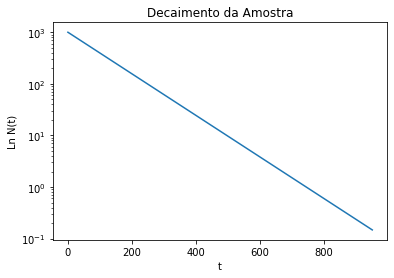

In [45]:
element.grafico(tInit = 0, tFinal = 1000, delta_t = 50, yscale = "log")